<a href="https://colab.research.google.com/github/AndreasRemp/ECE-Thesis-Quantum-Heuristics/blob/main/Quantum_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install packages
!pip install qiskit qiskit-aer --upgrade --quiet
!pip install pylatexenc
# Restart the kernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5a8a93e131c8a4678a603e782edcdf58fa30e4936f1ccba32a79a3e6cb34c026
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
# Greedy best-first search algorithm

from typing import Any, Iterable

class PriorityQueue:
    def __init__(self):
        self._data = []

    def push(self, item: Any, priority: float):
        self._data.append((priority, item))

    def pop(self) -> Any:
        self._data.sort(key=lambda x: x[0])
        return self._data.pop(0)[1]

    def is_empty(self) -> bool:
        return len(self._data) == 0


def greedy_search(initial_state, goal_state):
    frontier = PriorityQueue()
    frontier.push(initial_state, priority=h(initial_state))
    explored = set()

    while not frontier.is_empty():
        current = frontier.pop()

        if current == goal_state:
            return "Goal reached!"

        explored.add(current)

        for next_state in get_neighbors(current):
            if next_state not in explored:
                frontier.push(next_state, priority=h(next_state))

    return "No solution found."


def get_neighbors(state) -> Iterable:
    return []


def h(state) -> float:
    return 0.0


if __name__ == "__main__":
    print(greedy_search("start", "goal"))


No solution found.


In [3]:
# A* search algorithm

from typing import Any, Iterable

class PriorityQueue:
    def __init__(self):
        self._data = []

    def push(self, item: Any, priority: float):
        self._data.append((priority, item))

    def pop(self) -> Any:
        self._data.sort(key=lambda x: x[0])
        return self._data.pop(0)[1]

    def is_empty(self) -> bool:
        return len(self._data) == 0


def a_star_search(initial_state, goal_state):
    # Frontier stores nodes ordered by f(n) = g(n) + h(n)
    frontier = PriorityQueue()
    frontier.push(initial_state, priority=0)

    # Cost so far g(n)
    cost_so_far = {initial_state: 0}

    while not frontier.is_empty():
        current = frontier.pop()

        if current == goal_state:
            return "Optimal solution found!"

        for next_state in get_neighbors(current):
            # Unit step cost
            new_cost = cost_so_far[current] + 1

            # Relaxation
            if next_state not in cost_so_far or new_cost < cost_so_far[next_state]:
                cost_so_far[next_state] = new_cost
                # f(n) = g(n) + h(n)
                f_score = new_cost + h(next_state)
                frontier.push(next_state, priority=f_score)

    return "No solution found."


def get_neighbors(state) -> Iterable:
    return []


def h(state) -> float:
    return 0.0


if __name__ == "__main__":
    print(a_star_search("start", "goal"))


No solution found.


Final board configurations (after rule application):
{'11100001': 524, '10010011': 500}


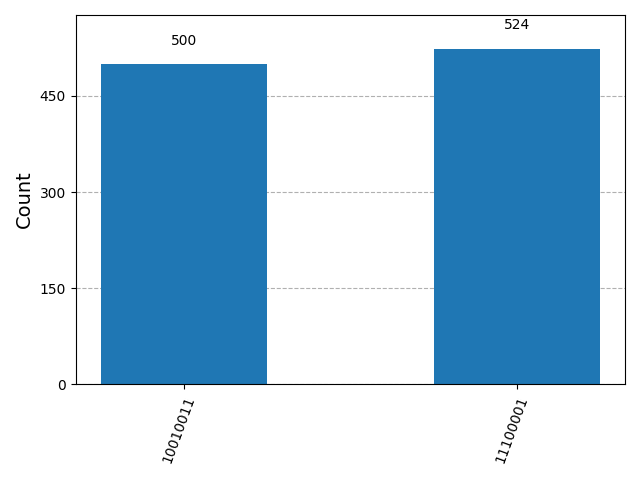

In [4]:
#imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import Image
import matplotlib.pyplot as plt

#3 puzzle search depth 1, as a Gate


# CORE CIRCUIT

qc_core = QuantumCircuit(14)

# INITIAL STATE
qc_core.x(0)
qc_core.x(4)
qc_core.x(5)
qc_core.x(7)

qc_core.h(13)   # path descriptor

# RULE TRACING - IF PART
qc_core.ccx(0, 1, 9)   # Rule 1
qc_core.ccx(2, 3, 10)  # Rule 2
qc_core.ccx(4, 5, 11)  # Rule 3
qc_core.ccx(6, 7, 12)  # Rule 4

# RULE 1
qc_core.ccx(9, 13, 8)
qc_core.cswap(8, 0, 4)
qc_core.cswap(8, 1, 5)
qc_core.ccx(9, 13, 8)
qc_core.x(13)
qc_core.ccx(9, 13, 8)
qc_core.cswap(8, 0, 2)
qc_core.cswap(8, 1, 3)
qc_core.ccx(9, 13, 8)
qc_core.x(13)

# RULE 2
qc_core.ccx(10, 13, 8)
qc_core.cswap(8, 2, 6)
qc_core.cswap(8, 3, 7)
qc_core.ccx(10, 13, 8)
qc_core.x(13)
qc_core.ccx(10, 13, 8)
qc_core.cswap(8, 0, 2)
qc_core.cswap(8, 1, 3)
qc_core.ccx(10, 13, 8)
qc_core.x(13)

# RULE 3
qc_core.ccx(11, 13, 8)
qc_core.cswap(8, 0, 4)
qc_core.cswap(8, 1, 5)
qc_core.ccx(11, 13, 8)
qc_core.x(13)
qc_core.ccx(11, 13, 8)
qc_core.cswap(8, 4, 6)
qc_core.cswap(8, 5, 7)
qc_core.ccx(11, 13, 8)
qc_core.x(13)

# RULE 4
qc_core.ccx(12, 13, 8)
qc_core.cswap(8, 2, 6)
qc_core.cswap(8, 3, 7)
qc_core.ccx(12, 13, 8)
qc_core.x(13)
qc_core.ccx(12, 13, 8)
qc_core.cswap(8, 4, 6)
qc_core.cswap(8, 5, 7)
qc_core.ccx(12, 13, 8)
qc_core.x(13)

#gate
puzzle_gate = qc_core.to_gate(label="PuzzleStep")

#circuit
qc2 = QuantumCircuit(14, 8)
qc2.append(puzzle_gate, qc2.qubits[:14])

# measure
for i in range(8):
    qc2.measure(i, i)


# SIMULATION

simulator = AerSimulator()
qc2_transpiled = transpile(qc2, simulator)
result = simulator.run(qc2_transpiled).result()
counts = result.get_counts()

print("Final board configurations (after rule application):")
print(counts)

fig = plot_histogram(counts)
fig.savefig("histogram.png")
Image("histogram.png")


Final board configurations (after rule application):
01111000 (-> [0, 1, 3, 2]) : 246
Tile mismatch: 3
10011100 (-> [0, 3, 2, 1]) : 257
Tile mismatch: 4
00011011 (-> [3, 1, 2, 0]) : 521
Tile mismatch: 3


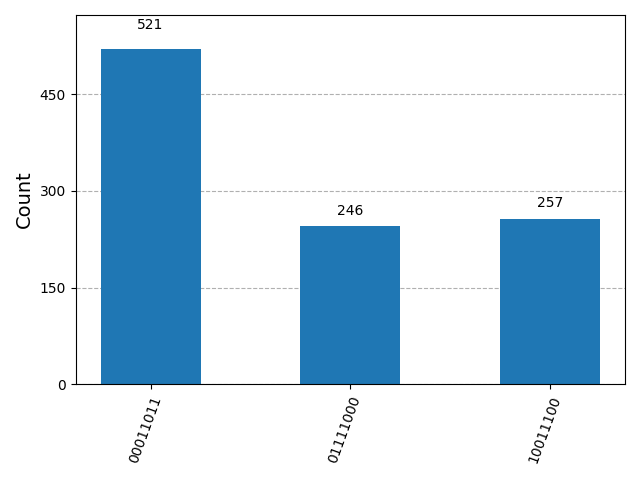

┌───┐┌───┐ ░                                                          »
 q_0: ┤ X ├┤ X ├─░───■───────────────────────X────────────────────X─────────»
      ├───┤├───┤ ░   │                       │                    │         »
 q_1: ┤ X ├┤ X ├─░───■───────────────────────┼──X─────────────────┼──X──────»
      ├───┤└───┘ ░   │                       │  │                 │  │      »
 q_2: ┤ X ├──────░───┼────■──────────────────┼──┼─────────────────X──┼──────»
      ├───┤┌───┐ ░   │    │                  │  │                 │  │      »
 q_3: ┤ X ├┤ X ├─░───┼────■──────────────────┼──┼─────────────────┼──X──────»
      ├───┤├───┤ ░   │    │                  │  │                 │  │      »
 q_4: ┤ X ├┤ X ├─░───┼────┼────■─────────────X──┼─────────────────┼──┼──────»
      ├───┤└───┘ ░   │    │    │             │  │                 │  │      »
 q_5: ┤ X ├──────░───┼────┼────■─────────────┼──X─────────────────┼──┼──────»
      ├───┤      ░   │    │    │             │  │                 │  │      »
 q_6: ┤ X ├──────░───┼────┼────┼────■────────┼──┼─────────────────┼──┼──────»
      ├───┤      ░   │    │    │    │        │  │                 │  │      »
 q_7: ┤ X ├──────░───┼────┼────┼────■────────┼──┼─────────────────┼──┼──────»
      └───┘      ░   │    │    │    │  ┌───┐ │  │ ┌───┐     ┌───┐ │  │ ┌───┐»
 q_8: ───────────░───┼────┼────┼────┼──┤ X ├─■──■─┤ X ├─────┤ X ├─■──■─┤ X ├»
                 ░ ┌─┴─┐  │    │    │  └─┬─┘      └─┬─┘     └─┬─┘      └─┬─┘»
 q_9: ───────────░─┤ X ├──┼────┼────┼────■──────────■─────────■──────────■──»
                 ░ └───┘┌─┴─┐  │    │    │          │         │          │  »
q_10: ───────────░──────┤ X ├──┼────┼────┼──────────┼─────────┼──────────┼──»
                 ░      └───┘┌─┴─┐  │    │          │         │          │  »
q_11: ───────────░───────────┤ X ├──┼────┼──────────┼─────────┼──────────┼──»
                 ░           └───┘┌─┴─┐  │          │         │          │  »
q_12: ───────────░────────────────┤ X ├──┼──────────┼─────────┼──────────┼──»
      ┌───┐      ░                └───┘  │          │  ┌───┐  │          │  »
q_13: ┤ H ├──────░───────────────────────■──────────■──┤ X ├──■──────────■──»
      └───┘      ░                                     └───┘                »
q_14: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
q_15: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
q_16: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
q_17: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
q_18: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
q_19: ───────────░──────────────────────────────────────────────────────────»
                 ░                                                          »
 c: 8/══════════════════════════════════════════════════════════════════════»
                                                                            »
«            ░                                            ░                 »
« q_0: ──────░────────────────────────────X───────────────░───────X─────────»
«            ░                            │               ░       │         »
« q_1: ──────░────────────────────────────┼──X────────────░───────┼──X──────»
«            ░                            │  │            ░       │  │      »
« q_2: ──────░───────X────────────────────X──┼────────────░───────┼──┼──────»
«            ░       │                    │  │            ░       │  │      »
« q_3: ──────░───────┼──X─────────────────┼──X────────────░───────┼──┼──────»
«            ░       │  │   

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# Utility Functions

def dectobin(dec_str):
    if len(dec_str) != 4 or any(d not in '0123' for d in dec_str):
        raise ValueError("Input must be a 4-digit string with digits in range 0 to 3.")
    return ''.join(format(int(d), '02b') for d in dec_str)

def qinit(qc, bin_str):
    if len(bin_str) != 8 or any(b not in '01' for b in bin_str):
        raise ValueError("Input must be an 8-bit binary string.")
    for i, bit in enumerate(bin_str):
        if bit == '1':
            qc.x(i)

def bintodec(bins):
    if len(bins) != 8:
        raise ValueError("Input must be an 8-bit binary string.")
    return [int(bins[i:i+2], 2) for i in range(0, 8, 2)]


def misplaced_tiles(bin_a, bin_b):
    """
    Compares two 8-bit binary strings as 4 2-bit tiles.
    Returns number of tiles (not bits) that are different.
    """
    if len(bin_a) != 8 or len(bin_b) != 8:
        raise ValueError("Inputs must be 8-bit binary strings.")
    tiles_a = [int(bin_a[i:i+2], 2) for i in range(0, 8, 2)]
    tiles_b = [int(bin_b[i:i+2], 2) for i in range(0, 8, 2)]
    return sum(a != b for a, b in zip(tiles_a, tiles_b))




# Setup Puzzle and Circuit

goal = "01101100"
qc = QuantumCircuit(20, 8)

# Initialize puzzle with "0132" → '00011110'
binary_state = dectobin("3120")
qinit(qc, binary_state)

# Invert all bits for rule detection
for i in range(8):
    qc.x(i)

qc.h(13)
qc.barrier()

# Apply trace logic
qc.ccx(0,1,9)
qc.ccx(2,3,10)
qc.ccx(4,5,11)
qc.ccx(6,7,12)

# Rule 1: Empty at 0,1 → move to 4,5 or 2,3 based on descriptor
qc.ccx(9,13,8)
qc.cswap(8,0,4)
qc.cswap(8,1,5)
qc.ccx(9,13,8)
qc.x(13)
qc.ccx(9,13,8)
qc.cswap(8,0,2)
qc.cswap(8,1,3)
qc.ccx(9,13,8)
qc.x(13)
qc.barrier()

# Rule 2: Empty at 2,3 → move to 6,7 or 0,1 based on descriptor
qc.ccx(10,13,8)
qc.cswap(8,2,6)
qc.cswap(8,3,7)
qc.ccx(10,13,8)
qc.x(13)
qc.ccx(10,13,8)
qc.cswap(8,0,2)
qc.cswap(8,1,3)
qc.ccx(10,13,8)
qc.x(13)
qc.barrier()

# Rule 3: Empty at 4,5 → move to 6,7 or 0,1 based on descriptor
qc.ccx(11,13,8)
qc.cswap(8,0,4)
qc.cswap(8,1,5)
qc.ccx(11,13,8)
qc.x(13)
qc.ccx(11,13,8)
qc.cswap(8,4,6)
qc.cswap(8,5,7)
qc.ccx(11,13,8)
qc.x(13)
qc.barrier()

# Rule 4: Empty at 6,7 → move to 2,3 or 4,5 based on descriptor
qc.ccx(12,13,8)
qc.cswap(8,2,6)
qc.cswap(8,3,7)
qc.ccx(12,13,8)
qc.x(13)
qc.ccx(12,13,8)
qc.cswap(8,4,6)
qc.cswap(8,5,7)
qc.ccx(12,13,8)
qc.x(13)
qc.barrier()

#Second Rule Application
qc.ccx(0,1,14)
qc.ccx(2,3,15)
qc.ccx(4,5,16)
qc.ccx(6,7,17)

qc.h(18)

# Rule 1: Empty at 0,1 → move to 4,5 or 2,3 based on descriptor
qc.ccx(14,18,19)
qc.cswap(19,0,4)
qc.cswap(19,1,5)
qc.ccx(14,18,19)
qc.x(18)
qc.ccx(14,18,19)
qc.cswap(19,0,2)
qc.cswap(19,1,3)
qc.ccx(14,18,19)
qc.x(18)
qc.barrier()

# Rule 2: Empty at 2,3 → move to 6,7 or 0,1 based on descriptor
qc.ccx(15,18,19)
qc.cswap(19,2,6)
qc.cswap(19,3,7)
qc.ccx(15,18,19)
qc.x(18)
qc.ccx(15,18,19)
qc.cswap(19,0,2)
qc.cswap(19,1,3)
qc.ccx(15,18,19)
qc.x(18)
qc.barrier()

# Rule 3: Empty at 4,5 → move to 6,7 or 0,1 based on descriptor
qc.ccx(16,18,19)
qc.cswap(19,0,4)
qc.cswap(19,1,5)
qc.ccx(16,18,19)
qc.x(18)
qc.ccx(16,18,19)
qc.cswap(19,4,6)
qc.cswap(19,5,7)
qc.ccx(16,18,19)
qc.x(18)
qc.barrier()

# Rule 4: Empty at 6,7 → move to 2,3 or 4,5 based on descriptor
qc.ccx(17,18,19)
qc.cswap(19,2,6)
qc.cswap(19,3,7)
qc.ccx(17,18,19)
qc.x(18)
qc.ccx(17,18,19)
qc.cswap(19,4,6)
qc.cswap(19,5,7)
qc.ccx(17,18,19)
qc.x(18)
qc.barrier()

# Invert qubits 0 through 7 again (restore original logic)

for i in range(8):
    qc.x(i)

# MEASURE TILE STATES (0–7)

for i in range(8):
    qc.measure(i, i)

# SIMULATE CIRCUIT

simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc_transpiled).result()
counts = result.get_counts()

# DISPLAY RESULTS

print("Final board configurations (after rule application):")
for bin_state, count in counts.items():
    dec = bintodec(bin_state[::-1])  # Reverse for Qiskit bit order
    print(f"{bin_state} (-> {dec}) : {count}")
    print("Tile mismatch:", misplaced_tiles(bin_state[::-1], goal))


fig = plot_histogram(counts)
fig.savefig("histogram.png")

from IPython.display import Image
display(Image("histogram.png"))

# Visualize Full Circuit

qc.draw('text')


In [6]:
# Depth 2 3-puzzle Grover search using forward oracle uncompute diffuser

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

ENC = {"1": "00", "2": "01", "3": "10", "X": "11"}

def board_to_bits(board4: str) -> str:
    b = board4.replace(" ", "").replace("χ", "X").replace("Χ", "X")
    if len(b) != 4:
        raise ValueError("Board must be 4 symbols like 31X2")
    return "".join(ENC[ch] for ch in b)

def build_L_gate():
    qc_core = QuantumCircuit(14)

    qc_core.ccx(0, 1, 9)
    qc_core.ccx(2, 3, 10)
    qc_core.ccx(4, 5, 11)
    qc_core.ccx(6, 7, 12)

    qc_core.ccx(9, 13, 8)
    qc_core.cswap(8, 0, 4)
    qc_core.cswap(8, 1, 5)
    qc_core.ccx(9, 13, 8)
    qc_core.x(13)
    qc_core.ccx(9, 13, 8)
    qc_core.cswap(8, 0, 2)
    qc_core.cswap(8, 1, 3)
    qc_core.ccx(9, 13, 8)
    qc_core.x(13)

    qc_core.ccx(10, 13, 8)
    qc_core.cswap(8, 2, 6)
    qc_core.cswap(8, 3, 7)
    qc_core.ccx(10, 13, 8)
    qc_core.x(13)
    qc_core.ccx(10, 13, 8)
    qc_core.cswap(8, 0, 2)
    qc_core.cswap(8, 1, 3)
    qc_core.ccx(10, 13, 8)
    qc_core.x(13)

    qc_core.ccx(11, 13, 8)
    qc_core.cswap(8, 0, 4)
    qc_core.cswap(8, 1, 5)
    qc_core.ccx(11, 13, 8)
    qc_core.x(13)
    qc_core.ccx(11, 13, 8)
    qc_core.cswap(8, 4, 6)
    qc_core.cswap(8, 5, 7)
    qc_core.ccx(11, 13, 8)
    qc_core.x(13)

    qc_core.ccx(12, 13, 8)
    qc_core.cswap(8, 2, 6)
    qc_core.cswap(8, 3, 7)
    qc_core.ccx(12, 13, 8)
    qc_core.x(13)
    qc_core.ccx(12, 13, 8)
    qc_core.cswap(8, 4, 6)
    qc_core.cswap(8, 5, 7)
    qc_core.ccx(12, 13, 8)
    qc_core.x(13)

    return qc_core.to_gate(label="L")

def oracle_full_goal(goal_bits: str):
    qc = QuantumCircuit(20)

    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(i)

    qc.mcx(list(range(8)), 19)

    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(i)

    qc.name = "O"
    return qc.to_gate(label="O")

def diffuser_2q():
    qc = QuantumCircuit(19)

    qc.h([13, 18])
    qc.x([13, 18])
    qc.h(18)
    qc.cz(13, 18)
    qc.h(18)
    qc.x([13, 18])
    qc.h([13, 18])

    qc.name = "G"
    return qc.to_gate(label="G")

def build_depth2_grover(initial_board: str, goal_board: str, grover_iters: int = 1):
    init_bits = board_to_bits(initial_board)
    goal_bits = board_to_bits(goal_board)

    L = build_L_gate()
    L_inv = L.inverse()
    O = oracle_full_goal(goal_bits)
    G = diffuser_2q()

    qc = QuantumCircuit(20, 2)

    for i, bit in enumerate(init_bits):
        if bit == "1":
            qc.x(i)

    qc.h(13)
    qc.h(18)

    qc.x(19)
    qc.h(19)

    for _ in range(grover_iters):
        qc.append(L, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
        qc.append(L, [0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 18])

        qc.append(O, list(range(20)))

        qc.append(L_inv, [0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 16, 17, 18])
        qc.append(L_inv, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

        qc.append(G, list(range(19)))

    qc.measure(13, 0)
    qc.measure(18, 1)

    return qc

def run_counts(qc: QuantumCircuit, shots: int = 4096):
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=shots).result()
    return result.get_counts()

if __name__ == "__main__":
    initial = "31X2"
    goal = "3X12"
    shots = 4096
    grover_iters = 1

    qc = build_depth2_grover(initial, goal, grover_iters=grover_iters)
    counts = run_counts(qc, shots=shots)

    print("initial", initial)
    print("goal", goal)
    print("counts on path qubits 13 and 18")
    print(counts)

    fig = plot_histogram(counts)
    plt.show()


initial 31X2
goal 3X12
counts on path qubits 13 and 18
{'00': 989, '10': 1028, '11': 1021, '01': 1058}


In [7]:
# Depth 3 quantum tree search for 3-puzzle using Grover amplification (Wichert-style)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

ENC = {"1": "00", "2": "01", "3": "10", "X": "11"}

def board_to_bits(board4: str) -> str:
    b = board4.replace(" ", "").replace("χ", "X").replace("Χ", "X")
    return "".join(ENC[ch] for ch in b)

# L operator (depth-1 production rules)

def build_L_gate():
    qc = QuantumCircuit(14)

    qc.ccx(0, 1, 9)
    qc.ccx(2, 3, 10)
    qc.ccx(4, 5, 11)
    qc.ccx(6, 7, 12)

    for t, a, b, c, d in [
        (9, 0, 4, 1, 5),
        (10, 2, 6, 3, 7),
        (11, 0, 4, 1, 5),
        (12, 2, 6, 3, 7),
    ]:
        qc.ccx(t, 13, 8)
        qc.cswap(8, a, b)
        qc.cswap(8, c, d)
        qc.ccx(t, 13, 8)
        qc.x(13)

    return qc.to_gate(label="L")


# Oracle marking full goal configuration

def oracle_goal(goal_bits):
    qc = QuantumCircuit(24)

    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(i)

    qc.mcx(list(range(8)), 22)

    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(i)

    qc.name = "O"
    return qc.to_gate(label="O")

# Grover diffuser for 3 path qubits (snippet-based)

def Grover():
    qc = QuantumCircuit(24)

    qc.h([13, 18, 23])
    qc.x([13, 18, 23])

    qc.h(13)
    qc.ccx(18, 23, 13)
    qc.h(13)

    qc.x([13, 18, 23])
    qc.h([13, 18, 23])

    qc.name = "G"
    return qc.to_gate(label="G")

# Depth 3 circuit

def build_depth3_circuit(initial_board, goal_board, grover_iters=1):
    init_bits = board_to_bits(initial_board)
    goal_bits = board_to_bits(goal_board)

    L = build_L_gate()
    L_inv = L.inverse()
    O = oracle_goal(goal_bits)
    G = Grover()

    qc = QuantumCircuit(24, 3)

    for i, bit in enumerate(init_bits):
        if bit == "1":
            qc.x(i)

    qc.h(13)
    qc.h(18)
    qc.h(23)

    qc.x(22)
    qc.h(22)

    for _ in range(grover_iters):
        qc.append(L, [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
        qc.append(L, [0,1,2,3,4,5,6,7,8,14,15,16,17,18])
        qc.append(L, [0,1,2,3,4,5,6,7,8,19,20,21,22,23])

        qc.append(O, list(range(24)))

        qc.append(L_inv, [0,1,2,3,4,5,6,7,8,19,20,21,22,23])
        qc.append(L_inv, [0,1,2,3,4,5,6,7,8,14,15,16,17,18])
        qc.append(L_inv, [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

        qc.append(G, list(range(24)))

    qc.measure(13, 0)
    qc.measure(18, 1)
    qc.measure(23, 2)

    return qc

# Run

if __name__ == "__main__":
    initial = "31X2"
    goal = "3X12"
    shots = 4096
    grover_iters = 1

    qc = build_depth3_circuit(initial, goal, grover_iters)
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    counts = sim.run(qc_t, shots=shots).result().get_counts()

    print("Depth-3 path counts:")
    print(counts)

    plot_histogram(counts)
    plt.show()


Depth-3 path counts:
{'100': 554, '110': 528, '101': 517, '001': 499, '010': 470, '000': 497, '111': 528, '011': 503}


Initial
2 X
1 3

Goal
1 2
3 X

Ελάχιστο depth 3
Πλήθος λύσεων σε αυτό το depth 1
Grover iterations 2

Qubit count 26


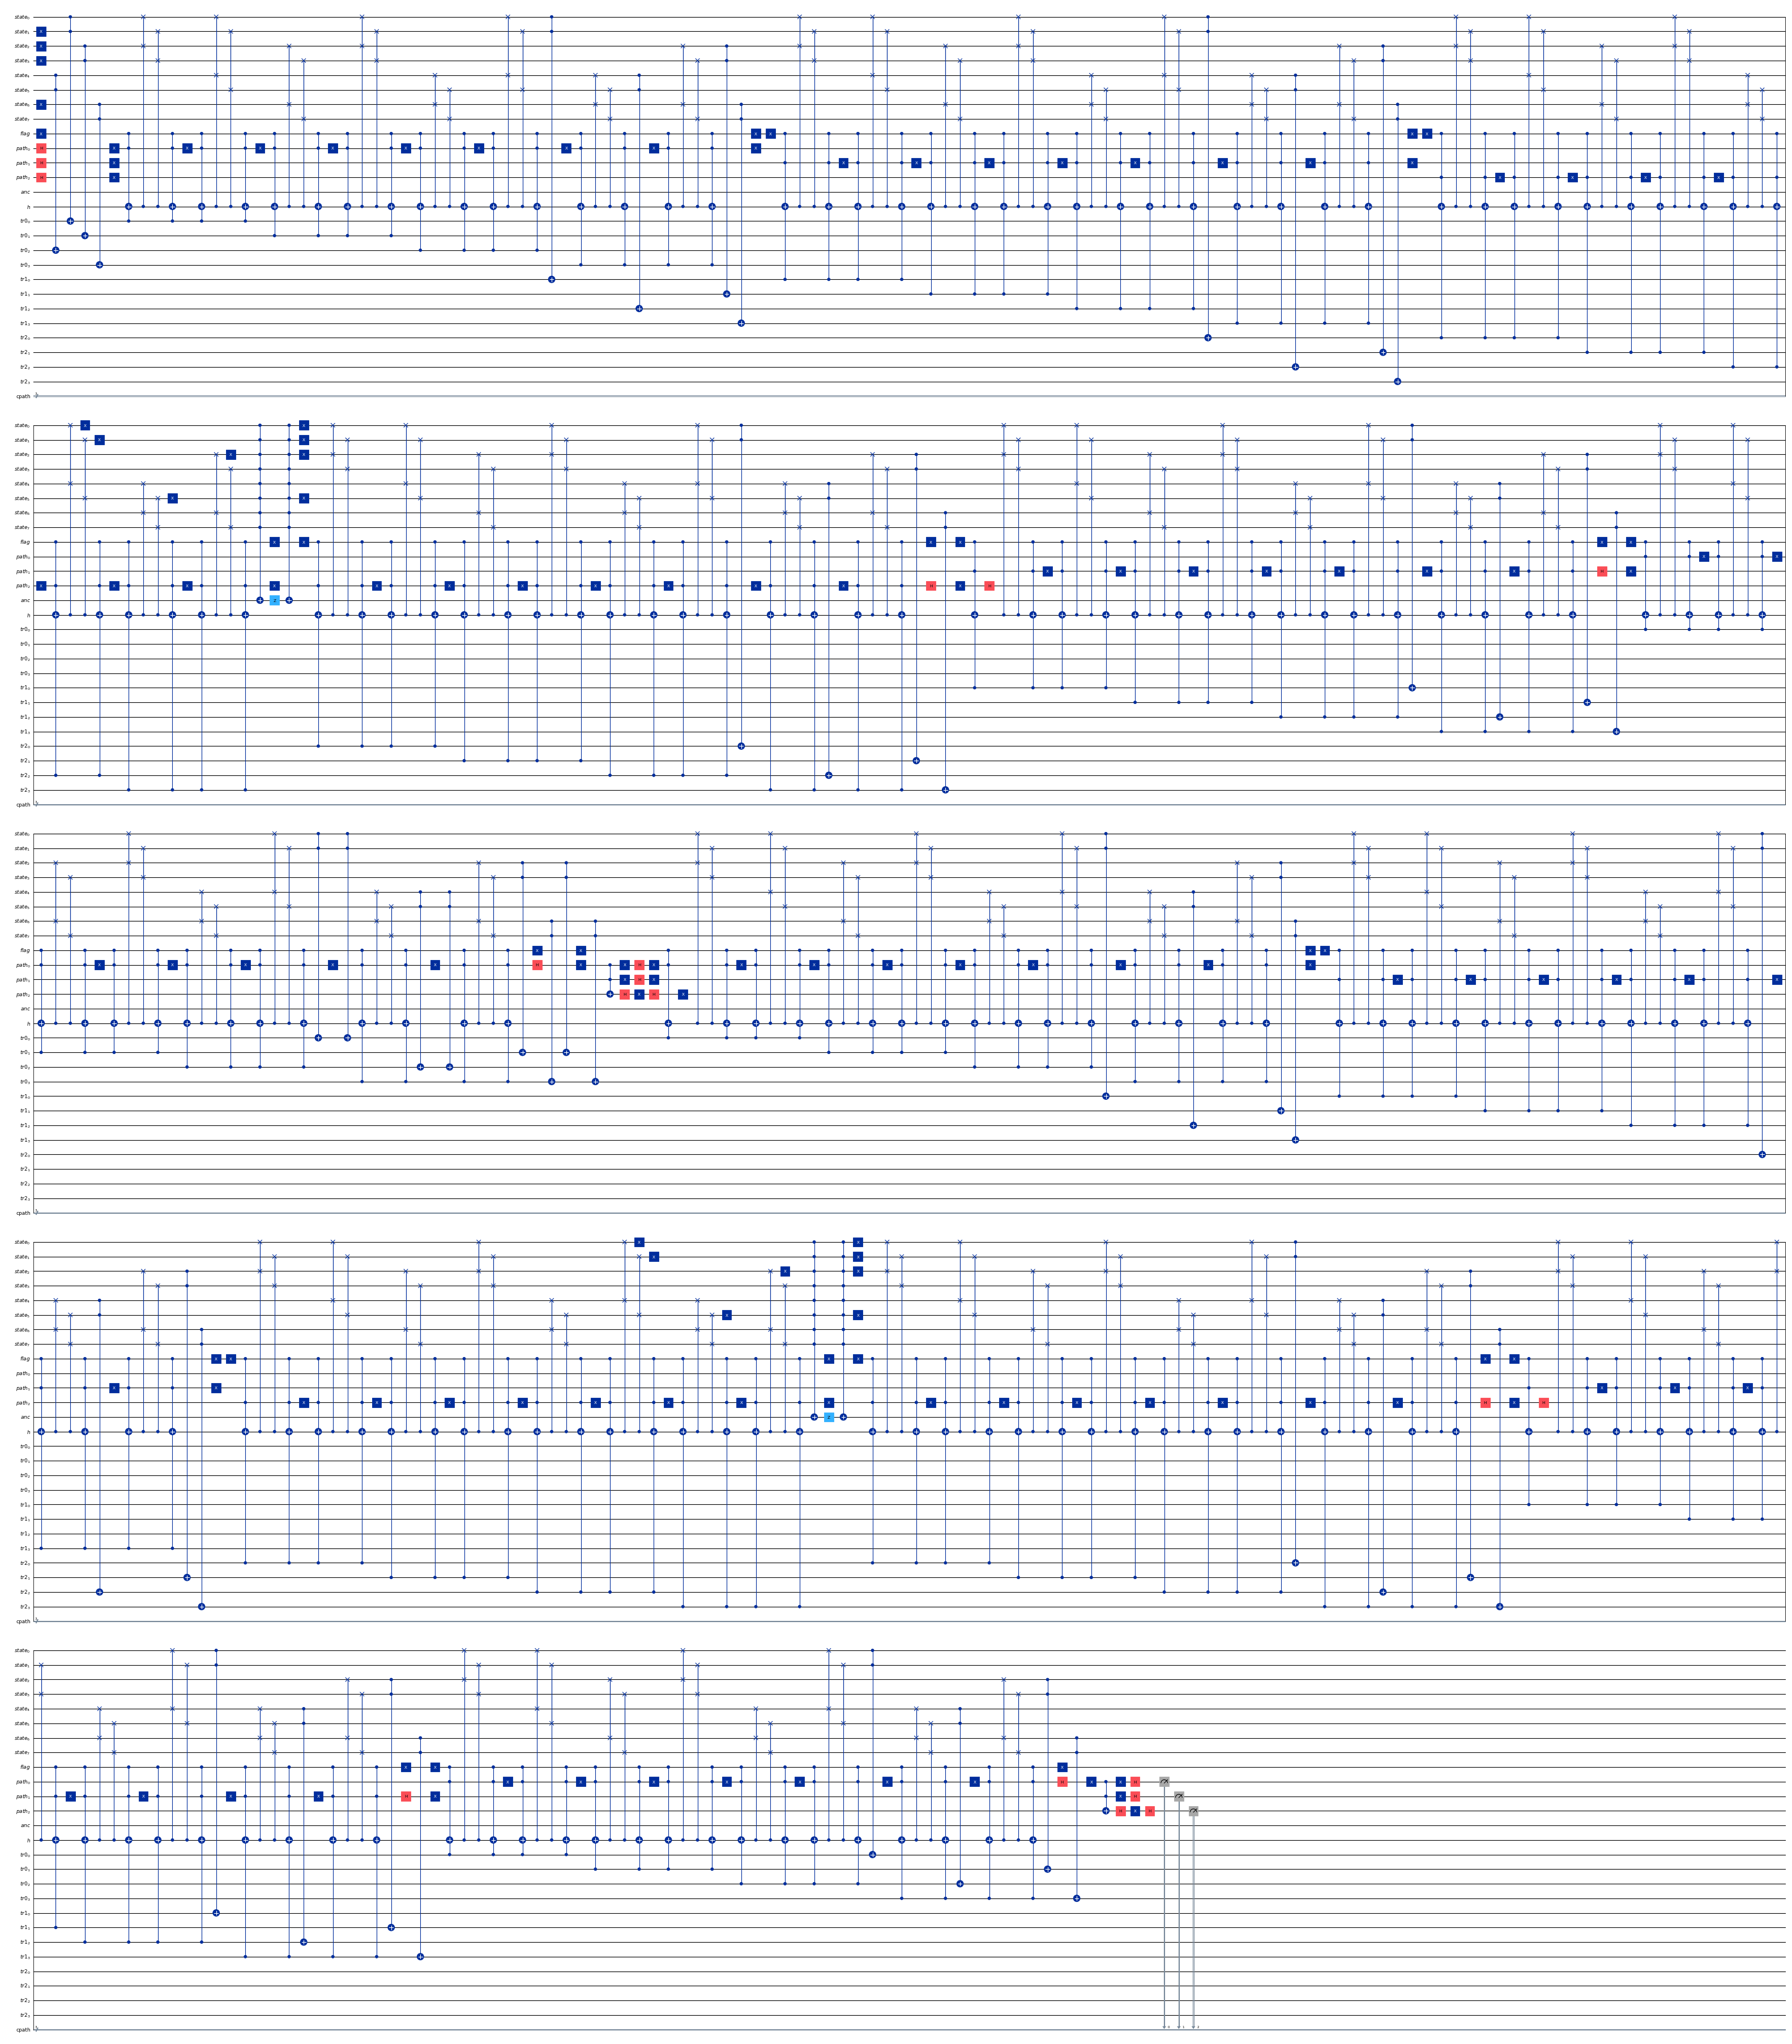


Measured path register bits 011
Moves in time order bits 110
Moves in LRUD LDR

Sequence of boards

Step 0
2 X
1 3

Step 1
X 2
1 3

Step 2
1 2
X 3

Step 3
1 2
3 X


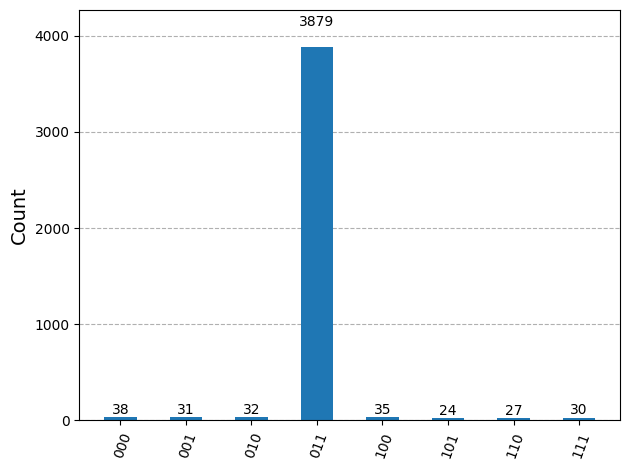


Top measured paths
011 3879
000 38
100 35
010 32
001 31
111 30
110 27
101 24


In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from collections import Counter
import math

ENC = {"1": "00", "2": "01", "3": "10", "X": "11"}

def norm_board(s: str) -> str:
    return s.replace(" ", "").replace("χ", "X").replace("Χ", "X")

def pretty_board(board4: str) -> str:
    b = norm_board(board4)
    return f"{b[0]} {b[1]}\n{b[2]} {b[3]}"

def board_to_bits(board4: str) -> str:
    b = norm_board(board4)
    if len(b) != 4:
        raise ValueError("Θέλω 4 σύμβολα για 2x2 πχ 31X2")
    return "".join(ENC[ch] for ch in b)

def pos_to_rc(p: int):
    return (p // 2, p % 2)

def rc_to_pos(r: int, c: int):
    return 2 * r + c

def blank_pos(board4: str) -> int:
    b = norm_board(board4)
    return b.index("X")

def swap_positions(board4: str, p: int, q: int) -> str:
    b = list(norm_board(board4))
    b[p], b[q] = b[q], b[p]
    return "".join(b)

def dir_from_to(p: int, q: int) -> str:
    r1, c1 = pos_to_rc(p)
    r2, c2 = pos_to_rc(q)
    if r2 == r1 and c2 == c1 + 1:
        return "R"
    if r2 == r1 and c2 == c1 - 1:
        return "L"
    if c2 == c1 and r2 == r1 + 1:
        return "D"
    if c2 == c1 and r2 == r1 - 1:
        return "U"
    raise ValueError("Μη έγκυρη γειτνίαση")

def ordered_neighbors_for_blank(p: int):
    r, c = pos_to_rc(p)
    candidates = []
    if c + 1 <= 1:
        candidates.append(rc_to_pos(r, c + 1))
    if r + 1 <= 1:
        candidates.append(rc_to_pos(r + 1, c))
    if c - 1 >= 0:
        candidates.append(rc_to_pos(r, c - 1))
    if r - 1 >= 0:
        candidates.append(rc_to_pos(r - 1, c))

    pref = {"R": 0, "D": 1, "L": 2, "U": 3}
    candidates.sort(key=lambda q: pref[dir_from_to(p, q)])
    if len(candidates) != 2:
        raise ValueError("Στο 2x2 πρέπει να υπάρχουν πάντα 2 γείτονες")
    return candidates

def apply_move_by_bit(board4: str, move_bit: str) -> str:
    b = norm_board(board4)
    p = blank_pos(b)
    neigh = ordered_neighbors_for_blank(p)
    q = neigh[0] if move_bit == "0" else neigh[1]
    return swap_positions(b, p, q)

def apply_move_by_bit_with_dir(board4: str, move_bit: str):
    b = norm_board(board4)
    p = blank_pos(b)
    neigh = ordered_neighbors_for_blank(p)
    q = neigh[0] if move_bit == "0" else neigh[1]
    d = dir_from_to(p, q)
    return swap_positions(b, p, q), d

def enumerate_paths(depth_t: int):
    for k in range(2 ** depth_t):
        yield format(k, f"0{depth_t}b")

def moves_in_time_order(measured_path_bits: str) -> str:
    return measured_path_bits[::-1]

def bits_to_lrud(initial_board: str, measured_path_bits: str) -> str:
    moves = moves_in_time_order(measured_path_bits)
    b = norm_board(initial_board)
    out = []
    for bit in moves:
        b, d = apply_move_by_bit_with_dir(b, bit)
        out.append(d)
    return "".join(out)

def reconstruct_solution(initial_board: str, measured_path_bits: str):
    moves = moves_in_time_order(measured_path_bits)
    b = norm_board(initial_board)
    seq = [b]
    for bit in moves:
        b = apply_move_by_bit(b, bit)
        seq.append(b)
    return moves, seq

def find_min_depth_solution(initial_board: str, goal_board: str, max_depth: int = 10):
    init = norm_board(initial_board)
    goal = norm_board(goal_board)
    for t in range(1, max_depth + 1):
        sols = []
        for path_bits in enumerate_paths(t):
            moves = moves_in_time_order(path_bits)
            b = init
            for bit in moves:
                b = apply_move_by_bit(b, bit)
            if b == goal:
                sols.append(path_bits)
        if sols:
            return t, sols
    return None, []

def recommended_grover_iters(num_states: int, num_marked: int):
    if num_marked <= 0:
        return 0
    k = (math.pi / 4.0) * math.sqrt(num_states / num_marked)
    return max(1, int(round(k)))

def cswap_tile(qc: QuantumCircuit, ctrl, state_q, u: int, v: int):
    qc.cswap(ctrl, state_q[2 * u], state_q[2 * v])
    qc.cswap(ctrl, state_q[2 * u + 1], state_q[2 * v + 1])

def swaps_dict_for_blank_positions():
    swaps = {}
    for p in range(4):
        neigh = ordered_neighbors_for_blank(p)
        swaps[p] = [(p, neigh[0]), (p, neigh[1])]
    return swaps

SWAPS = swaps_dict_for_blank_positions()

def goal_oracle_phase(qc: QuantumCircuit, state_q, anc_q, goal_bits: str):
    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(state_q[i])
    qc.mcx(list(state_q), anc_q[0])
    qc.z(anc_q[0])
    qc.mcx(list(state_q), anc_q[0])
    for i, bit in enumerate(goal_bits):
        if bit == "0":
            qc.x(state_q[i])

def diffuser_on_path(qc: QuantumCircuit, path_q):
    qc.h(path_q)
    qc.x(path_q)
    qc.h(path_q[-1])
    qc.mcx(list(path_q[:-1]), path_q[-1])
    qc.h(path_q[-1])
    qc.x(path_q)
    qc.h(path_q)

def forward_layer_L(qc: QuantumCircuit, state_q, flag_q, trace4_q, path_bit, helper_q):
    for p in range(4):
        a = state_q[2 * p]
        b = state_q[2 * p + 1]
        qc.ccx(a, b, trace4_q[p])

    qc.x(flag_q[0])

    for p in range(4):
        pair0, pair1 = SWAPS[p]

        qc.x(path_bit)
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        cswap_tile(qc, helper_q[0], state_q, pair0[0], pair0[1])
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        qc.x(path_bit)

        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        cswap_tile(qc, helper_q[0], state_q, pair1[0], pair1[1])
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])

    qc.x(flag_q[0])

def inverse_layer_Ldagger(qc: QuantumCircuit, state_q, flag_q, trace4_q, path_bit, helper_q):
    qc.x(flag_q[0])

    for p in range(4):
        pair0, pair1 = SWAPS[p]

        qc.x(path_bit)
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        cswap_tile(qc, helper_q[0], state_q, pair0[0], pair0[1])
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        qc.x(path_bit)

        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])
        cswap_tile(qc, helper_q[0], state_q, pair1[0], pair1[1])
        qc.mcx([trace4_q[p], path_bit, flag_q[0]], helper_q[0])

    qc.x(flag_q[0])

    for p in range(4):
        a = state_q[2 * p]
        b = state_q[2 * p + 1]
        qc.ccx(a, b, trace4_q[p])

def build_search_circuit(initial_board: str, goal_board: str, depth_t: int, grover_iters: int):
    init_bits = board_to_bits(initial_board)
    goal_bits = board_to_bits(goal_board)

    state = QuantumRegister(8, "state")
    flag = QuantumRegister(1, "flag")
    path = QuantumRegister(depth_t, "path")
    anc = QuantumRegister(1, "anc")
    helper = QuantumRegister(1, "h")
    trace_layers = [QuantumRegister(4, f"tr{i}") for i in range(depth_t)]
    cpath = ClassicalRegister(depth_t, "cpath")

    qc = QuantumCircuit(state, flag, path, anc, helper, *trace_layers, cpath)

    for i, bit in enumerate(init_bits):
        if bit == "1":
            qc.x(state[i])

    qc.h(path)

    for _ in range(grover_iters):
        for i in range(depth_t):
            forward_layer_L(qc, state, flag, trace_layers[i], path[i], helper)

        goal_oracle_phase(qc, state, anc, goal_bits)

        for i in reversed(range(depth_t)):
            inverse_layer_Ldagger(qc, state, flag, trace_layers[i], path[i], helper)

        diffuser_on_path(qc, path)

    qc.measure(path, cpath)
    return qc

def run_counts(qc: QuantumCircuit, shots: int):
    sim = AerSimulator()
    return sim.run(qc, shots=shots).result().get_counts()

def pick_best_path(counts: dict, depth_t: int):
    best = max(counts.items(), key=lambda kv: kv[1])[0].replace(" ", "")
    if len(best) != depth_t:
        best = best[:depth_t]
    return best

initial = "2X13"
goal = "123X"
shots = 4096
max_depth_try = 8

print("Initial")
print(pretty_board(initial))
print("\nGoal")
print(pretty_board(goal))

t_min, classical_solutions = find_min_depth_solution(initial, goal, max_depth=max_depth_try)

if t_min is None:
    raise ValueError(f"Δεν βρέθηκε λύση μέχρι depth {max_depth_try}")

depth_t = t_min
num_states = 2 ** depth_t
num_marked = len(classical_solutions)
grover_iters = recommended_grover_iters(num_states=num_states, num_marked=num_marked)

print("\nΕλάχιστο depth", depth_t)
print("Πλήθος λύσεων σε αυτό το depth", num_marked)
print("Grover iterations", grover_iters)

qc = build_search_circuit(initial, goal, depth_t=depth_t, grover_iters=grover_iters)

print("\nQubit count", qc.num_qubits)
display(qc.draw("mpl", fold=120, scale=0.4, idle_wires=False))

counts = run_counts(qc, shots=shots)
best_path = pick_best_path(counts, depth_t=depth_t)

moves_bits, seq = reconstruct_solution(initial, best_path)
moves_lrud = bits_to_lrud(initial, best_path)

print("\nMeasured path register bits", best_path)
print("Moves in time order bits", moves_bits)
print("Moves in LRUD", moves_lrud)

print("\nSequence of boards")
for k, s in enumerate(seq):
    print("\nStep", k)
    print(pretty_board(s))

display(plot_histogram(counts))

print("\nTop measured paths")
top = Counter(counts).most_common(min(12, len(counts)))
for bits, c in top:
    print(bits, c)


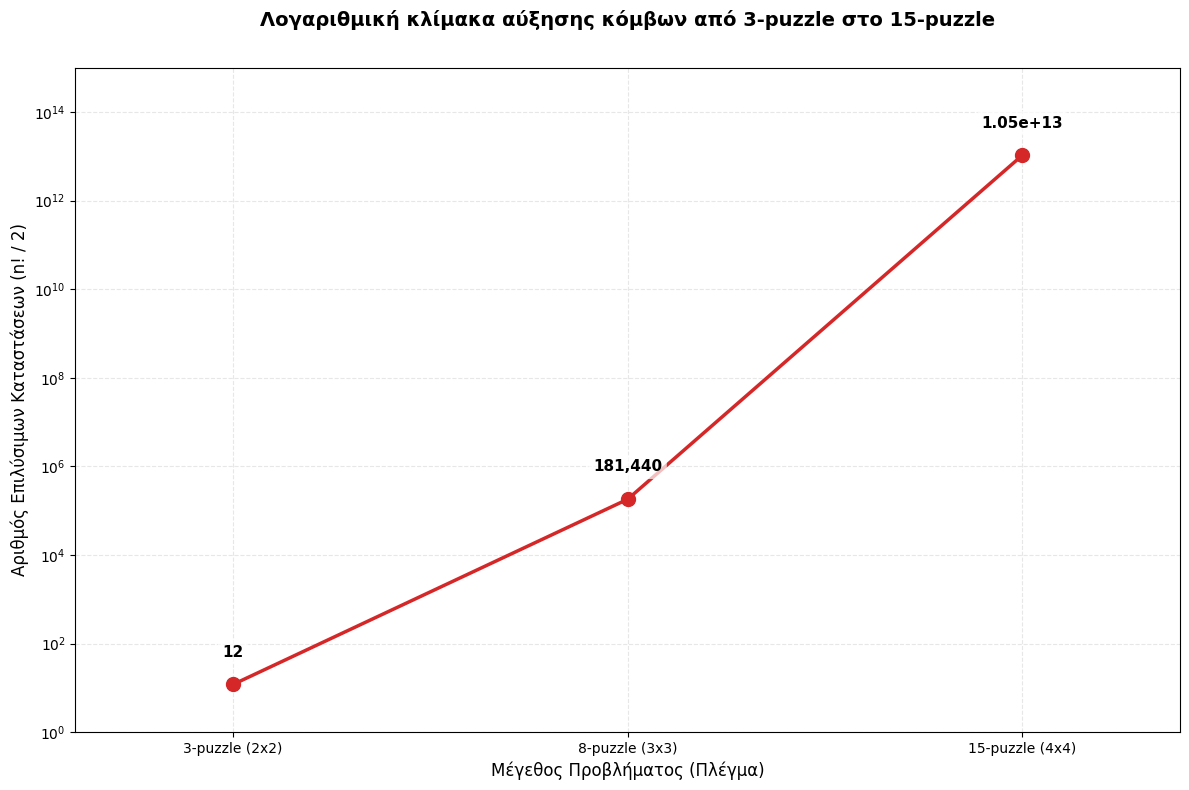

In [9]:
# States n! / 2
puzzles = ['3-puzzle (2x2)', '8-puzzle (3x3)', '15-puzzle (4x4)']
# 4!/2 = 12
# 9!/2 = 181,440
# 16!/2 = 10,461,394,944,000
states = [12, 181440, 10461394944000]

# Graph
plt.figure(figsize=(12, 8)) # Λίγο μεγαλύτερο figure για άνεση
plt.plot(puzzles, states, marker='o', linestyle='-', color='#d62728', linewidth=2.5, markersize=10)

plt.yscale('log')

plt.ylim(1, 1e15)

plt.margins(x=0.2)

# 3. Annotation w/ bigger offset
for i, txt in enumerate(states):
    if txt < 1000: label = str(txt)
    elif txt < 1e6: label = f"{txt:,}"
    else: label = f"{txt:.2e}"

    plt.annotate(label, (puzzles[i], states[i]),
                 textcoords="offset points",
                 xytext=(0, 20),
                 ha='center',
                 fontsize=11,
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))


plt.title('Λογαριθμική κλίμακα αύξησης κόμβων από 3-puzzle στο 15-puzzle', fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Μέγεθος Προβλήματος (Πλέγμα)', fontsize=12)
plt.ylabel('Αριθμός Επιλύσιμων Καταστάσεων (n! / 2)', fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()

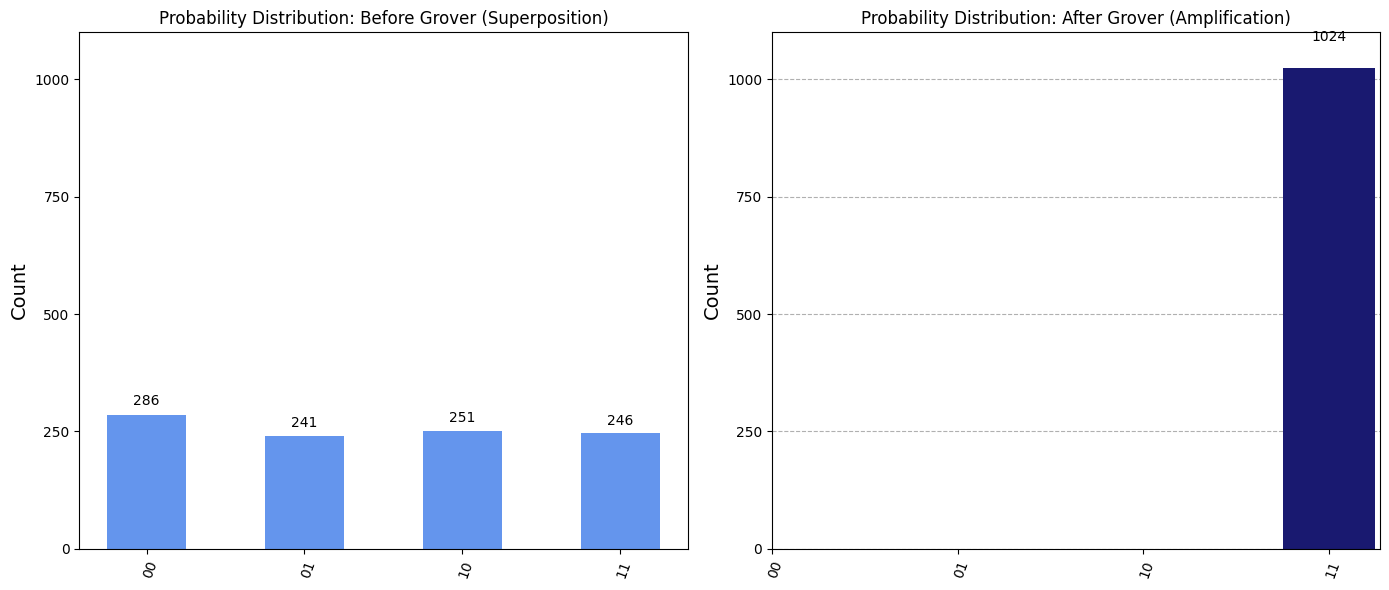

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCXGate
from qiskit.visualization import plot_histogram

# Modules

def state_A():
    """Αρχική κατάσταση του παζλ (qubits 0-7)"""
    qc = QuantumCircuit(8)
    qc.x(0)
    qc.x(1)
    return qc

def rules1():
    """Εφαρμογή κανόνων για το πρώτο βήμα (qubits 0-13)"""
    qc = QuantumCircuit(14)
    qc.cswap(13, 0, 2)
    qc.cswap(13, 1, 3)
    return qc

def rules2():
    """Εφαρμογή κανόνων για το δεύτερο βήμα (qubits 0-19)"""
    qc = QuantumCircuit(19)
    qc.cx(18, 4)
    qc.cx(18, 7)
    return qc

def oracle():
    """Ορίζει την κατάσταση-στόχο ως '1' στο qubit 19 (ancilla)"""
    qc = QuantumCircuit(20)
    # MCXGate
    qc.append(MCXGate(4), [2, 3, 4, 7, 19])
    return qc

def grover_diffuser():
    """Διαχύτης για τα 2 qubits των διαδρομών (13 και 18)"""
    qc = QuantumCircuit(2)
    qc.h([0, 1])
    qc.x([0, 1])
    qc.h(1)
    qc.cx(0, 1)
    qc.h(1)
    qc.x([0, 1])
    qc.h([0, 1])
    return qc

# Simulation

backend = AerSimulator()
qc_before = QuantumCircuit(20, 2)

qc_before.h([13, 18])
qc_before.measure([13, 18], [0, 1])

job_before = backend.run(transpile(qc_before, backend), shots=1024)
counts_before = job_before.result().get_counts()

qc_after = QuantumCircuit(20, 2)

# Phase Kickback initialization
qc_after.x(19)
qc_after.h(19)

# Step 1: Superposition of paths
qc_after.h([13, 18])

# Step 2: Forward Evolution (Tree expansion)
qc_after.append(state_A(), range(8))
qc_after.append(rules1(), range(14))
qc_after.append(rules2(), range(19))

# Step 3: Oracle call
qc_after.append(oracle(), range(20))

# Step 4: Un-computation (Crucial for entanglement management)
qc_after.append(rules2().inverse(), range(19))
qc_after.append(rules1().inverse(), range(14))
qc_after.append(state_A().inverse(), range(8))

# Step 5: Diffuser on path descriptors
qc_after.append(grover_diffuser(), [13, 18])

# Final Measurement
qc_after.measure([13, 18], [0, 1])

job_after = backend.run(transpile(qc_after, backend), shots=1024)
counts_after = job_after.result().get_counts()

# Visualization

all_possible_paths = {'00': 0, '01': 0, '10': 0, '11': 0}

full_counts_before = all_possible_paths.copy()
full_counts_before.update(counts_before)

full_counts_after = all_possible_paths.copy()
full_counts_after.update(counts_after)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram Before Grover
plot_histogram(full_counts_before, ax=ax1, color='cornflowerblue')
ax1.set_title("Probability Distribution: Before Grover (Superposition)", fontsize=12)
ax1.set_ylim(0, 1100)

# Histogram After Grover
plot_histogram(full_counts_after, ax=ax2, color='midnightblue')
ax2.set_title("Probability Distribution: After Grover (Amplification)", fontsize=12)
ax2.set_ylim(0, 1100)

plt.tight_layout()
plt.show()

Τελική κατάσταση 123456780
Βήματα 41
Manhattan αρχή 15 τέλος 0

Δείγμα ενός βήματος
Lookahead candidates 14
Marked indices [0, 1]
Grover iterations 2
Επιλεγμένο index 0
Επιλεγμένο path DRUL


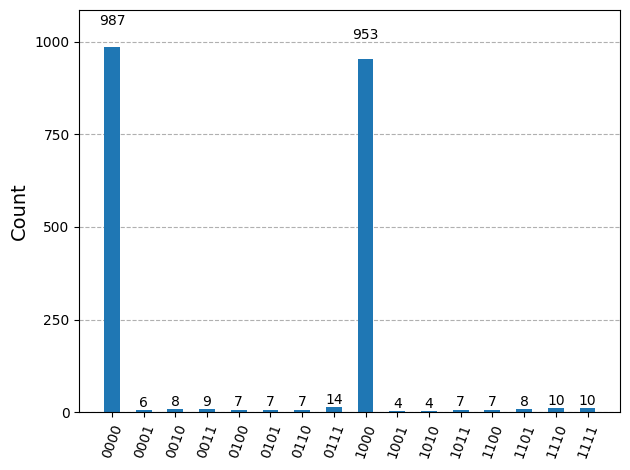

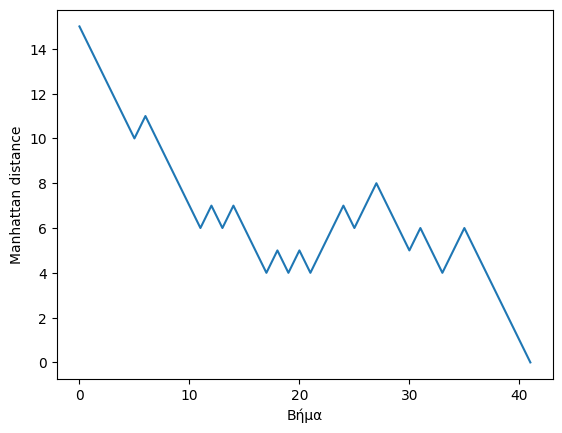

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from collections import deque

goal_default = "123456780"

def neighbors_8puzzle(state: str):
    z = state.index("0")
    r, c = divmod(z, 3)
    out = []
    def swap(i, j):
        s = list(state)
        s[i], s[j] = s[j], s[i]
        return "".join(s)
    if r > 0:
        out.append(("U", swap(z, z - 3)))
    if r < 2:
        out.append(("D", swap(z, z + 3)))
    if c > 0:
        out.append(("L", swap(z, z - 1)))
    if c < 2:
        out.append(("R", swap(z, z + 1)))
    return out

def manhattan_distance(state: str, goal: str = goal_default):
    goal_pos = {ch: i for i, ch in enumerate(goal)}
    dist = 0
    for i, ch in enumerate(state):
        if ch == "0":
            continue
        gi = goal_pos[ch]
        r1, c1 = divmod(i, 3)
        r2, c2 = divmod(gi, 3)
        dist += abs(r1 - r2) + abs(c1 - c2)
    return dist

def expand_candidates(current: str, goal: str, lookahead: int, beam_k: int):
    reverse = {"U":"D", "D":"U", "L":"R", "R":"L"}

    q = deque()
    q.append((current, "", None))
    seen = {current: 0}

    results = []
    while q:
        s, path, last = q.popleft()
        depth = len(path)
        if depth == lookahead:
            h = manhattan_distance(s, goal)
            g = depth
            f = g + h
            results.append((f, h, path, s))
            continue

        for mv, ns in neighbors_8puzzle(s):
            if last is not None and mv == reverse[last]:
                continue
            nd = depth + 1
            if ns in seen and seen[ns] <= nd:
                continue
            seen[ns] = nd
            q.append((ns, path + mv, mv))

    results.sort(key=lambda x: (x[0], x[1], x[2]))
    results = results[:beam_k]
    return results

def grover_iterations(n_states: int, n_marked: int):
    if n_marked <= 0:
        return 0
    val = (np.pi / 4.0) * np.sqrt(n_states / n_marked)
    return max(1, int(np.floor(val)))

def diffuser(qc: QuantumCircuit, qbits):
    qc.h(qbits)
    qc.x(qbits)
    last = qbits[-1]
    qc.h(last)
    if len(qbits) > 1:
        qc.mcx(qbits[:-1], last)
    else:
        qc.z(last)
    qc.h(last)
    qc.x(qbits)
    qc.h(qbits)

def oracle_mark_indices(qc: QuantumCircuit, idx_q, anc_q, marked_indices):
    n = len(idx_q)
    for idx in marked_indices:
        bits = format(idx, f"0{n}b")
        for i, b in enumerate(bits):
            if b == "0":
                qc.x(idx_q[i])
        qc.mcx(list(idx_q), anc_q[0])
        for i, b in enumerate(bits):
            if b == "0":
                qc.x(idx_q[i])

def build_grover_selector(num_items: int, marked_indices, shots: int = 1024, return_qc: bool = False):
    n_qubits = int(np.ceil(np.log2(max(2, num_items))))
    N = 2 ** n_qubits
    M = len(marked_indices)
    iters = grover_iterations(N, M)

    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    idx_q = list(range(n_qubits))
    anc = n_qubits

    qc.x(anc)
    qc.h(anc)
    qc.h(idx_q)

    for _ in range(iters):
        oracle_mark_indices(qc, idx_q, [anc], marked_indices)
        diffuser(qc, idx_q)

    qc.measure(idx_q, list(range(n_qubits)))

    sim = AerSimulator()
    tqc = transpile(qc, sim)
    counts = sim.run(tqc, shots=shots).result().get_counts()

    if return_qc:
        return counts, qc, iters, n_qubits
    return counts, iters, n_qubits

def pick_index_from_counts(counts, num_items: int):
    ordered = sorted(counts.items(), key=lambda kv: kv[1], reverse=True)
    for bitstr, _ in ordered:
        bits = bitstr.replace(" ", "")
        idx = int(bits[::-1], 2)
        if idx >= num_items:
            idx = idx % num_items
        return idx
    return 0

def hybrid_grover_8puzzle(initial: str, goal: str = goal_default,
                          lookahead: int = 4, beam_k: int = 16,
                          max_steps: int = 120, shots: int = 1024,
                          show_one_step_artifacts: bool = True):

    current = initial
    visited = {current}
    trace = [(0, current, manhattan_distance(current, goal))]

    one_step_payload = None

    for t in range(1, max_steps + 1):
        if current == goal:
            break

        cand = expand_candidates(current, goal, lookahead, beam_k)
        if not cand:
            break

        fmin = cand[0][0]
        marked = [i for i, (f, h, path, s) in enumerate(cand) if f == fmin]

        counts, iters, n_q = build_grover_selector(len(cand), marked, shots=shots, return_qc=False)
        chosen_idx = pick_index_from_counts(counts, len(cand))

        for bitstr, _ in sorted(counts.items(), key=lambda kv: kv[1], reverse=True):
            idx_try = int(bitstr.replace(" ", "")[::-1], 2)
            if idx_try >= len(cand):
                idx_try = idx_try % len(cand)
            next_path = cand[idx_try][2]
            mv = next_path[0]
            next_state = dict(neighbors_8puzzle(current))[mv]
            if next_state not in visited:
                chosen_idx = idx_try
                break

        chosen_path = cand[chosen_idx][2]
        mv = chosen_path[0]
        next_state = dict(neighbors_8puzzle(current))[mv]

        current = next_state
        visited.add(current)
        trace.append((t, current, manhattan_distance(current, goal)))

        if show_one_step_artifacts and one_step_payload is None:
            one_step_payload = {
                "candidates": cand,
                "marked": marked,
                "counts": counts,
                "iters": iters,
                "n_qubits": n_q,
                "chosen_idx": chosen_idx,
                "chosen_path": chosen_path
            }

    return current, trace, one_step_payload

initial = "425087316"
goal = "123456780"

final_state, trace, payload = hybrid_grover_8puzzle(
    initial, goal,
    lookahead=4,
    beam_k=16,
    max_steps=120,
    shots=2048,
    show_one_step_artifacts=True
)

print("Τελική κατάσταση", final_state)
print("Βήματα", len(trace) - 1)
print("Manhattan αρχή", trace[0][2], "τέλος", trace[-1][2])

if payload is not None:
    print("\nΔείγμα ενός βήματος")
    print("Lookahead candidates", len(payload["candidates"]))
    print("Marked indices", payload["marked"])
    print("Grover iterations", payload["iters"])
    print("Επιλεγμένο index", payload["chosen_idx"])
    print("Επιλεγμένο path", payload["chosen_path"])
    display(plot_histogram(payload["counts"]))

steps = [x[0] for x in trace]
hvals = [x[2] for x in trace]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps, hvals)
plt.xlabel("Βήμα")
plt.ylabel("Manhattan distance")
plt.show()


Λύση βρέθηκε
Μήκος διαδρομής 23
Επεκτάσεις 569
Manhattan αρχή 15 τέλος 0

Δείγμα βήματος επιλογής
Batch size 3
Index qubits 2
Grover iterations 1
Marked indices [0, 1]
Chosen index 1
Πιθανότητα να μετρηθεί marked 0.501


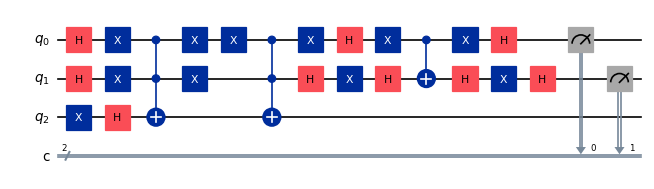

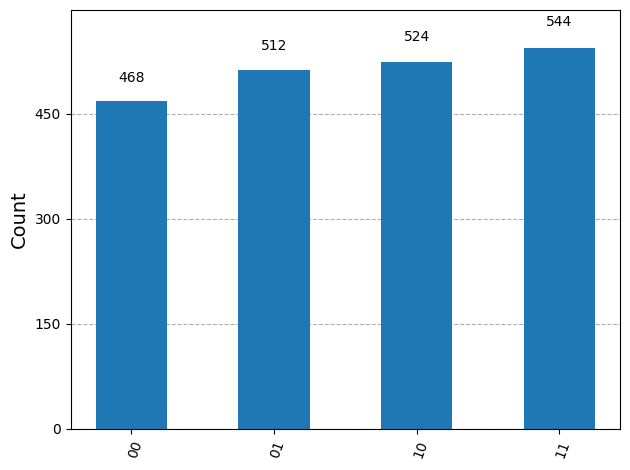

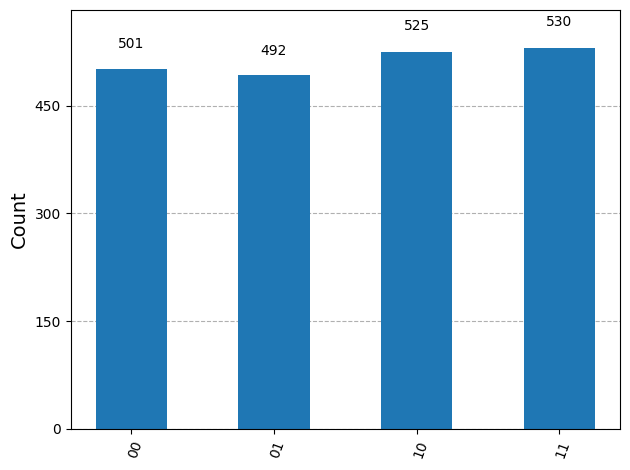

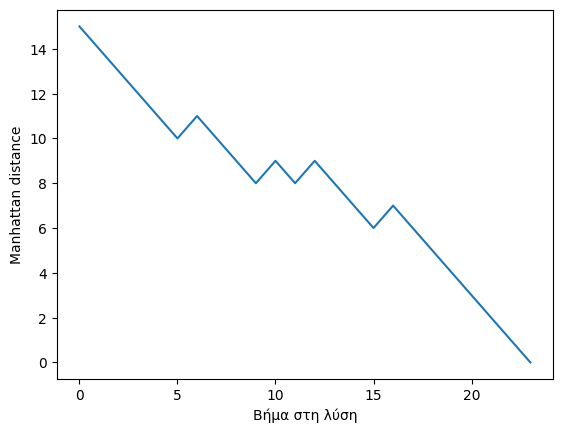

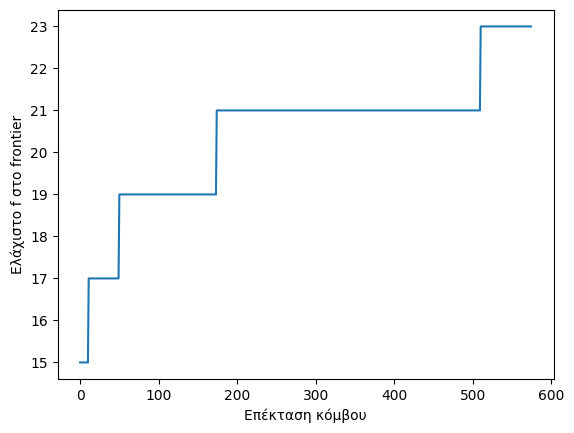


Κινήσεις λύσης
DRULURDRDLULDRRUULLDRRD


In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate

import numpy as np
import heapq
import matplotlib.pyplot as plt

try:
    from IPython.display import display
except Exception:
    display = print


goal_default = "123456780"


def is_solvable_8puzzle(state: str) -> bool:
    a = [int(x) for x in state if x != "0"]
    inv = 0
    for i in range(len(a)):
        for j in range(i + 1, len(a)):
            if a[i] > a[j]:
                inv += 1
    return (inv % 2) == 0


def neighbors_8puzzle(state: str):
    z = state.index("0")
    r, c = divmod(z, 3)

    def swap(i, j):
        s = list(state)
        s[i], s[j] = s[j], s[i]
        return "".join(s)

    out = []
    if r > 0:
        out.append(("U", swap(z, z - 3)))
    if r < 2:
        out.append(("D", swap(z, z + 3)))
    if c > 0:
        out.append(("L", swap(z, z - 1)))
    if c < 2:
        out.append(("R", swap(z, z + 1)))
    return out


def manhattan_distance(state: str, goal: str = goal_default) -> int:
    goal_pos = {ch: i for i, ch in enumerate(goal)}
    dist = 0
    for i, ch in enumerate(state):
        if ch == "0":
            continue
        gi = goal_pos[ch]
        r1, c1 = divmod(i, 3)
        r2, c2 = divmod(gi, 3)
        dist += abs(r1 - r2) + abs(c1 - c2)
    return dist


def grover_iterations(N: int, M: int) -> int:
    if M <= 0 or M >= N:
        return 0
    val = (np.pi / 4.0) * np.sqrt(N / M)
    k = int(np.floor(val))
    return max(1, k)


def apply_mcx(qc: QuantumCircuit, controls, target):
    qc.append(MCXGate(len(controls)), list(controls) + [target])


def oracle_mark_indices_phase(qc: QuantumCircuit, idx_q, anc_q, marked_indices):
    n = len(idx_q)
    for idx in marked_indices:
        bits = format(idx, f"0{n}b")
        for i, b in enumerate(bits):
            if b == "0":
                qc.x(idx_q[i])

        apply_mcx(qc, idx_q, anc_q[0])

        for i, b in enumerate(bits):
            if b == "0":
                qc.x(idx_q[i])


def diffuser(qc: QuantumCircuit, qbits):
    qc.h(qbits)
    qc.x(qbits)
    last = qbits[-1]
    qc.h(last)

    if len(qbits) > 1:
        apply_mcx(qc, qbits[:-1], last)
    else:
        qc.z(last)

    qc.h(last)
    qc.x(qbits)
    qc.h(qbits)


def build_grover_selector(num_items: int, marked_indices, shots: int = 2048, with_grover: bool = True):
    n_qubits = int(np.ceil(np.log2(max(2, num_items))))
    N = 2 ** n_qubits
    M = len(marked_indices)
    iters = grover_iterations(N, M) if with_grover else 0

    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    idx_q = list(range(n_qubits))
    anc = [n_qubits]

    qc.x(anc[0])
    qc.h(anc[0])
    qc.h(idx_q)

    if iters > 0:
        for _ in range(iters):
            oracle_mark_indices_phase(qc, idx_q, anc, marked_indices)
            diffuser(qc, idx_q)

    qc.measure(idx_q, list(range(n_qubits)))

    sim = AerSimulator()
    tqc = transpile(qc, sim)
    counts = sim.run(tqc, shots=shots).result().get_counts()
    return counts, qc, iters, n_qubits


def pick_index_from_counts(counts: dict, num_items: int):
    ordered = sorted(counts.items(), key=lambda kv: kv[1], reverse=True)
    for bitstr, _ in ordered:
        bits = bitstr.replace(" ", "")
        idx = int(bits[::-1], 2)
        if idx < num_items:
            return idx
    return None


def quantum_choose_from_batch(batch_size: int, marked: list, shots: int = 2048, retries: int = 4):
    counts_g, qc_g, iters, n_qubits = build_grover_selector(batch_size, marked, shots=shots, with_grover=True)
    chosen = pick_index_from_counts(counts_g, batch_size)
    if chosen is None:
        chosen = 0

    if chosen not in marked:
        ok = False
        for _ in range(retries):
            counts_g2, _, _, _ = build_grover_selector(batch_size, marked, shots=shots, with_grover=True)
            chosen2 = pick_index_from_counts(counts_g2, batch_size)
            if chosen2 is not None and chosen2 in marked:
                counts_g = counts_g2
                chosen = chosen2
                ok = True
                break
        if not ok:
            chosen = marked[0]

    counts_b, _, _, _ = build_grover_selector(batch_size, marked, shots=shots, with_grover=False)

    prob_marked = 0.0
    total = sum(counts_g.values())
    if total > 0:
        for bitstr, c in counts_g.items():
            bits = bitstr.replace(" ", "")
            idx = int(bits[::-1], 2)
            if idx in marked:
                prob_marked += c / total

    payload = {
        "counts_baseline": counts_b,
        "counts_grover": counts_g,
        "qc_selector": qc_g,
        "iters": iters,
        "n_qubits": n_qubits,
        "marked": marked,
        "chosen": chosen,
        "prob_marked": prob_marked,
        "batch_size": batch_size,
    }
    return chosen, payload


def reconstruct_path(parents: dict, moves: dict, start: str, goal: str):
    cur = goal
    seq_states = [cur]
    seq_moves = []
    while cur != start:
        p = parents[cur]
        seq_moves.append(moves[cur])
        cur = p
        seq_states.append(cur)
    seq_states.reverse()
    seq_moves.reverse()
    return seq_states, seq_moves


def hybrid_astar_quantum(initial: str, goal: str = goal_default, batch_max: int = 16, shots: int = 2048,
                        max_expansions: int = 200000, capture_once: bool = True):

    if not is_solvable_8puzzle(initial):
        raise ValueError("Η αρχική κατάσταση δεν είναι επιλύσιμη για 8 puzzle")

    g_score = {initial: 0}
    parents = {}
    moves = {}
    closed = set()

    h0 = manhattan_distance(initial, goal)
    heap = [(h0, h0, 0, 0, initial)]
    counter = 1

    expansions = 0
    capture_payload = None
    fmin_trace = []

    while heap and expansions < max_expansions:
        fmin = heap[0][0]

        batch = []
        while heap and heap[0][0] == fmin and len(batch) < batch_max:
            batch.append(heapq.heappop(heap))

        if not batch:
            batch.append(heapq.heappop(heap))

        batch_states = [x[4] for x in batch]
        batch_h = [x[1] for x in batch]
        hmin = min(batch_h)
        marked = [i for i, h in enumerate(batch_h) if h == hmin]

        if len(batch_states) == 1 or len(marked) == len(batch_states):
            chosen_i = marked[0]
            payload = None
        else:
            chosen_i, payload = quantum_choose_from_batch(len(batch_states), marked, shots=shots)
            if capture_once and capture_payload is None and payload is not None:
                capture_payload = payload

        chosen_node = batch[chosen_i]
        for i, node in enumerate(batch):
            if i != chosen_i:
                heapq.heappush(heap, node)

        state = chosen_node[4]
        g = chosen_node[2]
        fmin_trace.append(fmin)

        if state == goal:
            seq_states, seq_moves = reconstruct_path(parents, moves, initial, goal)
            stats = {
                "expansions": expansions,
                "path_len": len(seq_moves),
                "initial_h": h0,
                "final_h": 0,
                "open_size": len(heap),
            }
            return seq_states, seq_moves, stats, capture_payload, fmin_trace

        if state in closed:
            continue
        closed.add(state)
        expansions += 1

        for mv, ns in neighbors_8puzzle(state):
            if ns in closed:
                continue
            ng = g + 1
            if ns not in g_score or ng < g_score[ns]:
                g_score[ns] = ng
                nh = manhattan_distance(ns, goal)
                nf = ng + nh
                parents[ns] = state
                moves[ns] = mv
                heapq.heappush(heap, (nf, nh, ng, counter, ns))
                counter += 1

    raise RuntimeError("Δεν βρέθηκε λύση εντός ορίου επεκτάσεων")


initial = "425087316"
goal = "123456780"

seq_states, seq_moves, stats, payload, fmin_trace = hybrid_astar_quantum(
    initial=initial,
    goal=goal,
    batch_max=16,
    shots=2048,
    max_expansions=200000,
    capture_once=True
)

print("Λύση βρέθηκε")
print("Μήκος διαδρομής", stats["path_len"])
print("Επεκτάσεις", stats["expansions"])
print("Manhattan αρχή", stats["initial_h"], "τέλος", stats["final_h"])

if payload is not None:
    print("\nΔείγμα βήματος επιλογής")
    print("Batch size", payload["batch_size"])
    print("Index qubits", payload["n_qubits"])
    print("Grover iterations", payload["iters"])
    print("Marked indices", payload["marked"])
    print("Chosen index", payload["chosen"])
    print("Πιθανότητα να μετρηθεί marked", round(payload["prob_marked"], 4))

    display(payload["qc_selector"].draw("mpl", fold=120, scale=0.6, idle_wires=False))
    display(plot_histogram(payload["counts_baseline"]))
    display(plot_histogram(payload["counts_grover"]))

h_path = [manhattan_distance(s, goal) for s in seq_states]
steps = list(range(len(h_path)))

plt.figure()
plt.plot(steps, h_path)
plt.xlabel("Βήμα στη λύση")
plt.ylabel("Manhattan distance")
plt.show()

plt.figure()
plt.plot(list(range(len(fmin_trace))), fmin_trace)
plt.xlabel("Επέκταση κόμβου")
plt.ylabel("Ελάχιστο f στο frontier")
plt.show()

print("\nΚινήσεις λύσης")
print("".join(seq_moves))
